Name:Piriyadharshini N
Roll No:24BAD086
MSE : 6.266115569116481
RMSE: 2.5032210388050995
R2  : 0.646907020740291


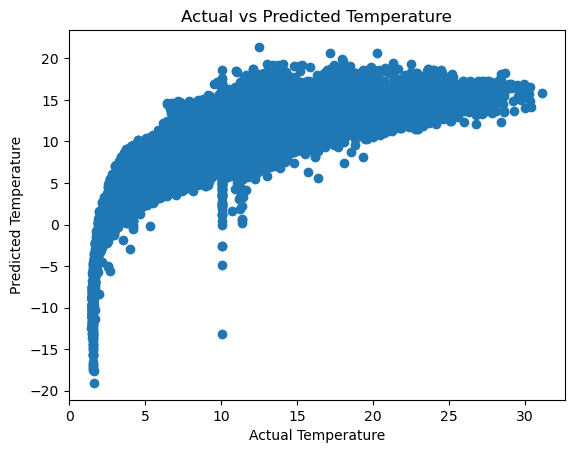

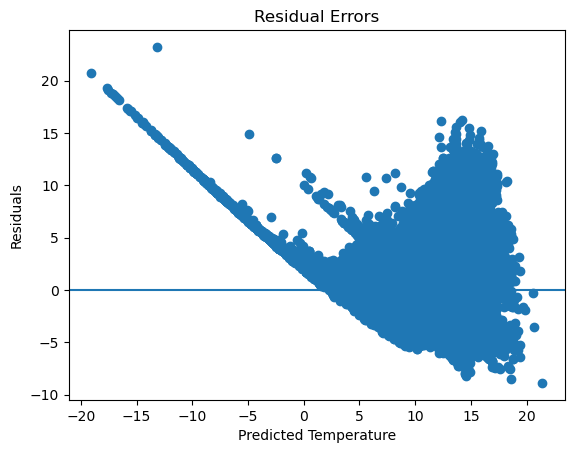

Ridge R2: 0.6469070213032113
Lasso R2: 0.6419380977359064


In [14]:
print("Name:Piriyadharshini N\nRoll No:24BAD086")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("bottle.csv", low_memory=False)

features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

data = df[features + [target]].copy()
data = data.fillna(data.median())

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Prediction
y_pred = lr.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)
# Actual vs Predicted Plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()
# Residual Plot
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.axhline(y=0)
plt.title("Residual Errors")
plt.show()
# Ridge and Lasso Regression
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
# Regularized Model Evaluation
print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))






Name:Piriyadharshini N
Roll No:24BAD086
Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1 Score : 0.0594059405940594


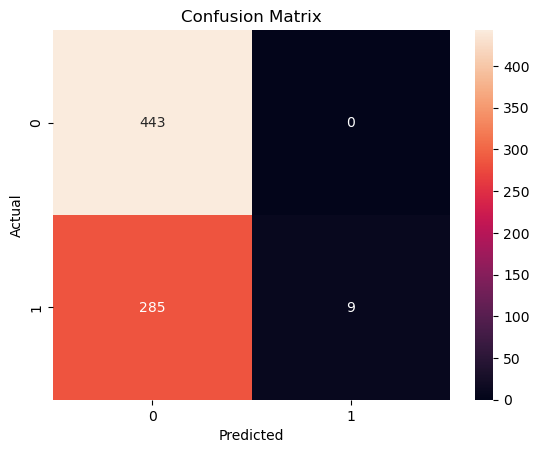

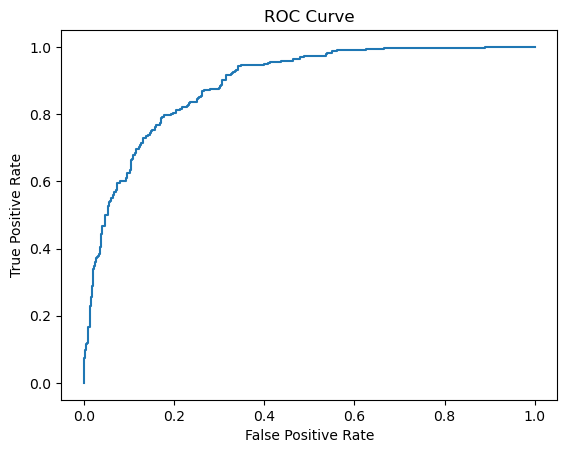

AUC Score: 0.8891755347737289


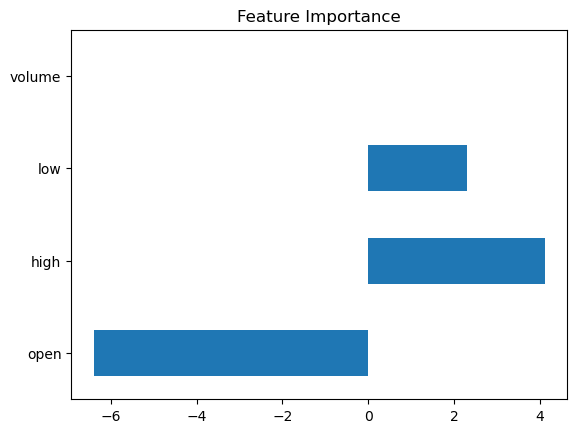

In [ ]:
print("Name:Piriyadharshini N\nRoll No:24BAD086")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Load Dataset
df = pd.read_csv("LICI - 10 minute data.csv")

# Remove Extra Spaces from Column Names
df.columns = df.columns.str.strip()

# Automatically Detect Required Columns
open_col = [c for c in df.columns if 'open' in c.lower()][0]
high_col = [c for c in df.columns if 'high' in c.lower()][0]
low_col = [c for c in df.columns if 'low' in c.lower()][0]
close_col = [c for c in df.columns if 'close' in c.lower()][0]
vol_col = [c for c in df.columns if 'vol' in c.lower()][0]
# Create Target Variable (Price Movement)
df['Price_Movement'] = np.where(
    df[close_col] > df[open_col], 1, 0
)
# Select Features
features = [open_col, high_col, low_col, vol_col]

X = df[features].fillna(df[features].median())
y = df['Price_Movement']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# AUC Score
print("AUC Score:", roc_auc_score(y_test, y_prob))
# Feature Importance (Coefficients)
importance = pd.Series(model.coef_[0], index=features)

plt.figure()
importance.plot(kind='barh', title="Feature Importance")
plt.show()

# Hyperparameter Tuning 
params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    params,
    cv=5
)

grid.fit(X_train, y_train)
# Best Model Evaluation
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Optimized Accuracy:", accuracy_score(y_test, best_pred))
